In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, accuracy_score

In [52]:
iris = load_iris()
x = iris['data']
y = iris['target']
train_x, test_x = train_test_split(x)
train_y, test_y = train_test_split(y)

In [189]:
est = KMeans(n_clusters=3)
est.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [190]:
import itertools
for order in list(itertools.permutations([0, 1, 2])):
    preds = np.choose(est.labels_, order).astype(np.int64)
    print(accuracy_score(preds, train_y))

0.35714285714285715
0.22321428571428573
0.38392857142857145
0.3125
0.33035714285714285
0.39285714285714285


In [182]:
preds = np.choose(est.labels_, [2, 1, 0]).astype(np.int64)

In [183]:
accuracy_score(preds, train_y)

0.35714285714285715

## PSO Algorithm

In [121]:
def dist_func(z, x):
    return np.linalg.norm(z-x)

In [136]:
pop_size = 100

a1 = a2 = 1.49618
w = 0.7298

# Initialize particles
particles = []
for n in range(pop_size):
    indexes = np.arange(train_x.shape[0])
    chosen_indexes = np.random.choice(indexes, 3, replace=False)
    particles.append(train_x[chosen_indexes])

particles = np.array(particles)   
local_best_particles = particles.copy()
local_best_fitnesses = np.full(pop_size, np.inf)

velocities = np.random.normal(0, 0.2, (pop_size, 3, 4))

In [137]:
def update_v(v, w, x, ind_opt, glob_opt):
    return w*v + a1*r1*(ind_opt - x) + a2*r2*(glob_opt - x)

def update_pos(x, v, lbest, gbest):
    return [x[i] + update_v(v[i], w, x[i], lbest[i], gbest[i]) 
            for i in range(len(x))]

In [138]:
maxiter = 200
global_best_fitness = np.inf

for i in range(maxiter):
    
    print('Progress: {}/{}\r'.format(i+1,maxiter), end='')
    
    fitnesses = []
    for j, particle in enumerate(particles):
        fitness = 0
        for z in train_x:
            # Calculate distance of data point z to each cluter centroid
            dists = [dist_func(z, centroid) for centroid in particle]
            fitness += np.min(dists)
        fitness = fitness / train_x.shape[0]
        fitnesses.append(fitness)
        
        # Update local best
        if fitness < local_best_fitnesses[j]:
            local_best_particles[j] = particle
            local_best_fitnesses[j] = fitness
    
    # Update global best
    _new_best_fitness = np.min(fitnesses)
    if _new_best_fitness < global_best_fitness:
        global_best_fitness = _new_best_fitness
        global_best = particles[np.argmin(fitnesses)]
    
    # Update step
    r1 = np.random.uniform()
    r2 = np.random.uniform()
    
    for pidx, particle in enumerate(particles):
        for cidx, centroid in enumerate(particle):
            centroid = update_pos(
                centroid, 
                velocities[pidx,cidx], 
                local_best_particles[pidx][cidx], 
                global_best[cidx])

In [192]:
def get_labels(particle):
    labels = []
    for z in train_x:
        dists = [dist_func(z, centroid) for centroid in particle]
        labels.append(np.argmin(dists))
    return labels

In [193]:
global_best

array([[4.8, 3.4, 1.6, 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [6.9, 3.2, 5.7, 2.3]])

In [194]:
pred_labels = get_labels(global_best)

In [195]:
import seaborn as sb

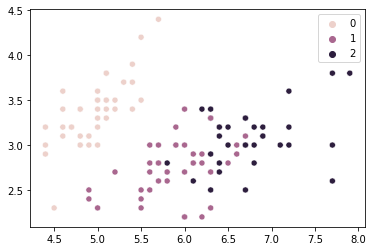

In [196]:
sb.scatterplot(x=train_x[:,0], y=train_x[:,1], hue=pred_labels)
plt.show()

In [197]:
accuracy_score(pred_labels, train_y)

0.38392857142857145

In [198]:
import itertools
for order in list(itertools.permutations([0, 1, 2])):
    preds = np.choose(pred_labels, order).astype(np.int64)
    print(accuracy_score(preds, train_y))

0.38392857142857145
0.33035714285714285
0.35714285714285715
0.39285714285714285
0.22321428571428573
0.3125
